In [41]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [42]:
_EPS = 1**-9
INF = 2048

class point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.mag = self.magnitude()
        
    def dist(self, p):
        return np.sqrt(np.power((p.x - self.x), 2) + np.power((p.y - self.y), 2))
    
    def is_in(self, circle):
        d = self.dist(circle.c)

        if d <= circle.r: # considering p inside circle when p is on circle
            return True
        else:
            return False

    def collinear(self, pi, pj):
        m = np.array([
                        [1, self.x, self.y],
                        [1, pi.x, pi.y],
                        [1, pj.x, pj.y]
                     ])
        m_det = np.linalg.det(m)
        return np.fabs(m_det) <= _EPS
    
    def minus(self, p):
        return point(self.x - p.x, self.y - p.y)
    
    def plus(self, p):
        return point(self.x + p.x, self.y + p.y)
    
    def scalar_mult(self, alpha):
        return point(self.x * alpha, self.y * alpha)
    
    def magnitude(self):
        return np.sqrt(self.x * self.x + self.y * self.y)
    
    def normalization(self):
        m = self.magnitude()
        return point(self.x / m, self.y / m)
    
    def equal(self, p):
        return self.x == p.x and self.y == p.y
    
    def angle(self, p):
        length1 = np.sqrt(self.x * self.x + self.y * self.y)
        length2 = np.sqrt(p.x * p.x + p.y * p.y)
        return np.arccos((self.x * p.x + self.y * p.y)/ (length1 * length2))
    
    def info(self):
        print(self.x, self.y)

In [43]:
class triangle(object):
    def __init__(self, p, q, r):
        self.p = p
        self.q = q
        self.r = r
        
    def sign(self, p, q, r):
        return (p.x - r.x) * (q.y - r.y) - (q.x - r.x) * (p.y - r.y)
    
    def is_inside(self, p):
        d1 = self.sign(p, self.p, self.q)
        d2 = self.sign(p, self.q, self.r)
        d3 = self.sign(p, self.r, self.p)
        
        has_neg = (d1 < 0) or (d2 < 0) or (d3 < 0)
        has_pos = (d1 > 0) or (d2 > 0) or (d3 > 0)
        
        return not(has_neg and has_pos)
    
    def info(self):
        print('p: ({}, {}) - q: ({}, {}) - r: ({}, {})'.format(self.p.x, self.p.y, self.q.x, self.q.y, self.r.x, self.r.y))

In [44]:
class edge(object):
    def __init__(self, p, q):
        self.p = p
        self.q = q
        self.marked = False
        self.trs = list()
        
    def info(self):
        print('p: ({}, {}), q: ({}, {})'.format(self.p.x, self.p.y, self.q.x, self.q.y))        

In [45]:
points_1 = list()

filename = 'fecho2.txt'

with open(filename, 'r') as f:
    for line in f:
        line = line.split()
        points_1.append(point(float(line[0]), float(line[1])))

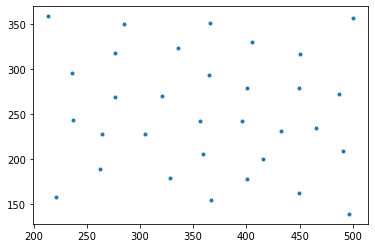

In [46]:
plt.scatter([p.x for p in points_1], [p.y for p in points_1], marker='.')
plt.show()

In [47]:
import operator

# sort points on x coordinate
def sort_points(points):
    sorted_points = sorted(points, key=operator.attrgetter('x'))
    
    return sorted_points

In [48]:
def intersection(a, b, c, d):
    m_abc = np.array([
                [1, a.x, a.y],
                [1, b.x, b.y],
                [1, c.x, c.y]
             ])
    
    m_abd = np.array([
                [1, a.x, a.y],
                [1, b.x, b.y],
                [1, d.x, d.y]
             ])
    
    m_cda = np.array([
                [1, c.x, c.y],
                [1, d.x, d.y],
                [1, a.x, a.y]
             ])
    
    m_cdb = np.array([
                [1, c.x, c.y],
                [1, d.x, d.y],
                [1, b.x, b.y]
             ])
    
    m_abc_det = np.linalg.det(m_abc)
    m_abd_det = np.linalg.det(m_abd)
    m_cda_det = np.linalg.det(m_cda)
    m_cdb_det = np.linalg.det(m_cdb)
    
    if ((m_abc_det < 0 and m_abd_det > 0) or (m_abc_det > 0 and m_abd_det < 0)) and ((m_cda_det < 0 and m_cdb_det > 0) or (m_cda_det > 0 and m_cdb_det < 0)):
        return True
    else:
        return False

## Incremental triangulation

In [49]:
def incremental_triangulation(points):
    added_points = list()
    points = sort_points(points)
    
    edges = list()
    
    edges.append(edge(points[0], points[1]))
    edges.append(edge(points[1], points[2]))
    edges.append(edge(points[2], points[0]))
    
    added_points.append(points[0])
    added_points.append(points[1])
    added_points.append(points[2])
    
    for p in points[3:]:
#         fig, ax = plt.subplots()
#         plt.scatter([p.x], [p.y], marker='x')
#         plt.scatter([p.x for p in points_1], [p.y for p in points_1], marker='.', color='black')
        for q in added_points:
            flag = False
            for e in edges:
                if intersection(p, q, e.p, e.q):
                    flag = True
                    break
            
            if not flag:
                pr = edge(p, q)
                edges.append(edge(p, q))
#                 for e in edges:
#                     polygon = plt.Polygon(np.array([[e.p.x, e.p.y], [e.q.x, e.q.y]]), edgecolor='red', facecolor='none')
#                     ax.add_artist(polygon)
#                 plt.show()
                
        added_points.append(p)
    
    return edges

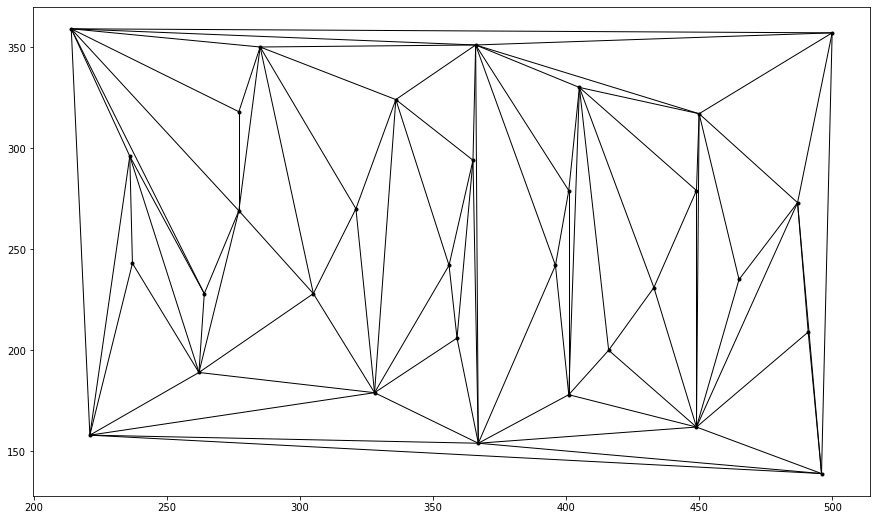

In [50]:
ans = incremental_triangulation(points_1)
# print(ans)

fig, ax = plt.subplots(figsize=(15,9))
plt.scatter([p.x for p in points_1], [p.y for p in points_1], marker='.', color='black')
for e in ans:
    polygon = plt.Polygon(np.array([[e.p.x, e.p.y], [e.q.x, e.q.y]]), edgecolor='black', facecolor='none')
    ax.add_artist(polygon)

plt.show()

In [51]:
def set_triangles(points, edges):
    point_adjs = dict()
    
    for p in points:
        point_adjs[p] = list()
    
    for e in edges:
        point_adjs[e.p].append(e.q)
        point_adjs[e.q].append(e.p)
    
    for e in edges:
        for r in points:
            if (r in point_adjs[e.p]) and (r in point_adjs[e.q]):
                e.trs.append(triangle(e.p, e.q, r))
                
    for e in edges:
        trs_r = set()
        
        for t in e.trs:
            points_t = [t.p, t.q, t.r]
            for p in points:
                if t.is_inside(p) and (p not in points_t):
                    trs_r.add(t)
        
        for t in trs_r:
            e.trs.remove(t)

In [52]:
set_triangles(points_1, ans)

In [53]:
# fig, ax = plt.subplots()
# plt.scatter([p.x for p in points_1], [p.y for p in points_1], marker='.', color='black')

# for e in ans:
# #     print("daosjk")
#     for t in e.trs:
#         v1, v2, v3 = t.p, t.q, t.r
#         polygon = plt.Polygon(np.array([[v1.x, v1.y], [v2.x, v2.y], [v3.x, v3.y]]), edgecolor='black', facecolor='none')
# #         polygon2 = plt.Polygon(np.array([[e.p.x, e.p.y], [e.q.x, e.q.y]]), edgecolor='red', facecolor='none')
#         ax.add_artist(polygon)
# #         ax.add_artist(polygon2)
# plt.show()

In [54]:
# for e in ans:
#     print('edge:')
#     [print(t) for t in e.trs]
#     for t in e.trs:
#         fig, ax = plt.subplots()
#         plt.scatter([p.x for p in points_1], [p.y for p in points_1], marker='.', color='black')
#         v1, v2, v3 = t.p, t.q, t.r
#         polygon = plt.Polygon(np.array([[v1.x, v1.y], [v2.x, v2.y], [v3.x, v3.y]]), edgecolor='black', facecolor='none')
#         polygon2 = plt.Polygon(np.array([[e.p.x, e.p.y], [e.q.x, e.q.y]]), edgecolor='red', facecolor='none')
#         ax.add_artist(polygon)
#         ax.add_artist(polygon2)
#         plt.show()

In [55]:
def in_circle(u, v, p, q):
    delta = np.array([
            [1, u.x, u.y, np.power(u.x, 2) + np.power(u.y, 2)],
            [1, v.x, v.y, np.power(v.x, 2) + np.power(v.y, 2)],
            [1, p.x, p.y, np.power(p.x, 2) + np.power(p.y, 2)],
            [1, q.x, q.y, np.power(q.x, 2) + np.power(q.y, 2)]
         ])
    
    gamma = np.array([
            [1, u.x, u.y],
            [1, v.x, v.y],
            [1, p.x, p.y]
        ])
    
    delta_det = np.linalg.det(delta)
    gamma_det = np.linalg.det(gamma)
    
    return delta_det * gamma_det < 0

In [56]:
def flip_edge(e):
    u, v = e.p, e.q
    p, q = e.trs[0].r, e.trs[1].r
    
#     e.p = p
#     e.q = q
    
    tr1 = triangle(p, q, u)
    tr2 = triangle(p, q, v)
    
    flipped_edge = edge(p, q)
    flipped_edge.trs.append(tr1)
    flipped_edge.trs.append(tr2)
    
#     e.trs = [tr1, tr2]    

    return flipped_edge

## Check illegal edges

In [57]:
# for e in ans:
#     if len(e.trs) == 2:
#         fig, ax = plt.subplots()
#         plt.scatter([p.x for p in points_1], [p.y for p in points_1], marker='.', color='black')
#         for t in e.trs:
#             v1, v2, v3 = t.p, t.q, t.r
#             polygon = plt.Polygon(np.array([[v1.x, v1.y], [v2.x, v2.y], [v3.x, v3.y]]), edgecolor='black', facecolor='none')
#             polygon2 = plt.Polygon(np.array([[e.p.x, e.p.y], [e.q.x, e.q.y]]), edgecolor='red', facecolor='none')
#             ax.add_artist(polygon)
#             ax.add_artist(polygon2)
#         plt.show()
        
#         if in_circle(e.p, e.q, e.trs[0].r, e.trs[1].r):
#             print('flip op')
#             fe = flip_edge(e)
#             fig, ax = plt.subplots()
#             plt.scatter([p.x for p in points_1], [p.y for p in points_1], marker='.', color='black')
#             for t in fe.trs:
#                 v1, v2, v3 = t.p, t.q, t.r
#                 polygon = plt.Polygon(np.array([[v1.x, v1.y], [v2.x, v2.y], [v3.x, v3.y]]), edgecolor='black', facecolor='none')
#                 polygon2 = plt.Polygon(np.array([[fe.p.x, fe.p.y], [fe.q.x, fe.q.y]]), edgecolor='red', facecolor='none')
#                 ax.add_artist(polygon)
#                 ax.add_artist(polygon2)
#             plt.show()
        

In [58]:
def delaunay(edges):
    stack = list()
    for e in edges:
        e.marked = True
        stack.append(e)
    
    while len(stack):
        print(len(stack))
        e = stack.pop()
        e.marked = False
        if len(e.trs) == 2:
            if in_circle(e.p, e.q, e.trs[0].r, e.trs[1].r):
                fe = flip_edge(e)

                for e_ in edges:
                    if (e_.p == e.p and e_.q == fe.p) or (e_.p == fe.p and e_.q == e.p):
                        up_edge = e_
                    elif (e_.p == fe.p and e_.q == e.q) or (e_.p == e.q and e_.q == fe.p):
                        pv_edge = e_
                    elif (e_.p == e.q and e_.q == fe.q) or (e_.p == fe.q and e_.q == e.q):
                        vq_edge = e_
                    elif (e_.p == e.p and e_.q == fe.q) or (e_.p == fe.q and e_.q == e.p):
                        qu_edge = e_

                e.p = fe.p
                e.q = fe.q

                abl = [up_edge, pv_edge, vq_edge, qu_edge]
                
                for ab in abl:
                    if not ab.marked:
                        ab.marked = True
                        stack.append(ab)

In [59]:
delaunay(ans)

89
88
87
86
85
84
83
85
84
83
82
81
80
79
78
77
76
75
77
76
75
74
73
72
71
73
72
71
70
69
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
58
57
56
55
54
53
52
51
50
49
48
47
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
32
31
30
29
28
27
26
25
24
23
22
23
22
21
20
19
18
19
18
17
16
15
14
13
15
14
13
12
11
10
9
11
10
9
8
7
9
8
7
6
5
4
3
2
4
3
2
1
